<a href="https://colab.research.google.com/github/vikas2308/Aerofit---Probability-and-Statistics/blob/main/Copy_of_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


pd.read_csv('/content/aerofit_treadmill.csv')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df = pd.read_csv('/content/aerofit_treadmill.csv')
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
product_count = df['Product'].value_counts().reset_index()
product_count.columns = ['Product_Name', 'Count']
product_count


,Product_Name,Count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']
gender_count

,Gender,Count
0,Male,104
1,Female,76


In [ ]:
marital_status_count = df['MaritalStatus'].value_counts().reset_index()
marital_status_count.columns = ['MaritalStatus', 'Count']
marital_status_count

,MaritalStatus,Count
0,Partnered,107
1,Single,73


In [ ]:
Fitness_count = df['Fitness'].value_counts().reset_index()
Fitness_count.columns = ['Fitness', 'Count']
Fitness_count


,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [ ]:
df.describe()[['Age', 'Income', 'Miles']].loc[['min', 'max']]

,Age,Income,Miles
min,18.0,29562.0,21.0
max,50.0,104581.0,360.0


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

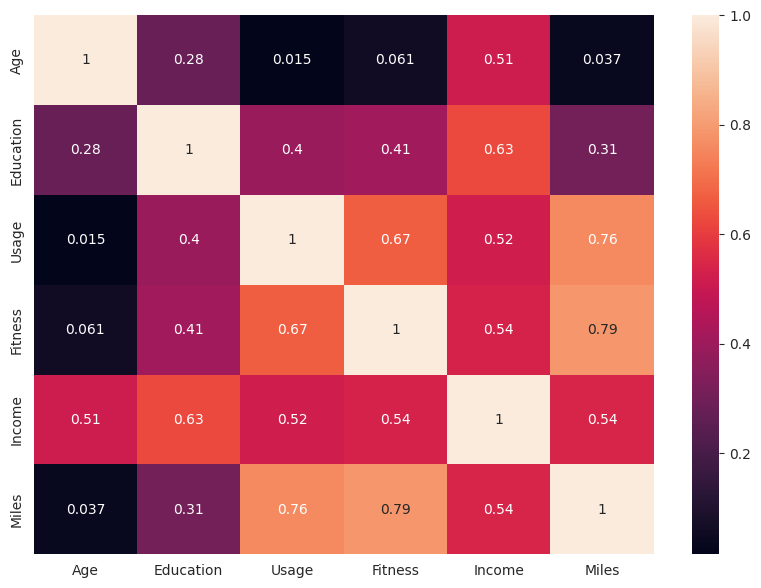

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# features with higher correlation : >0.65

df.corr().unstack()[(df.corr().unstack()>0.65) & (df.corr().unstack()!=1)]

Usage    Fitness    0.668606
         Miles      0.759130
Fitness  Usage      0.668606
         Miles      0.785702
Miles    Usage      0.759130
         Fitness    0.785702
dtype: float64

In [ ]:
d = df[["Age","Education","Fitness","Income","Miles","Gender"]]

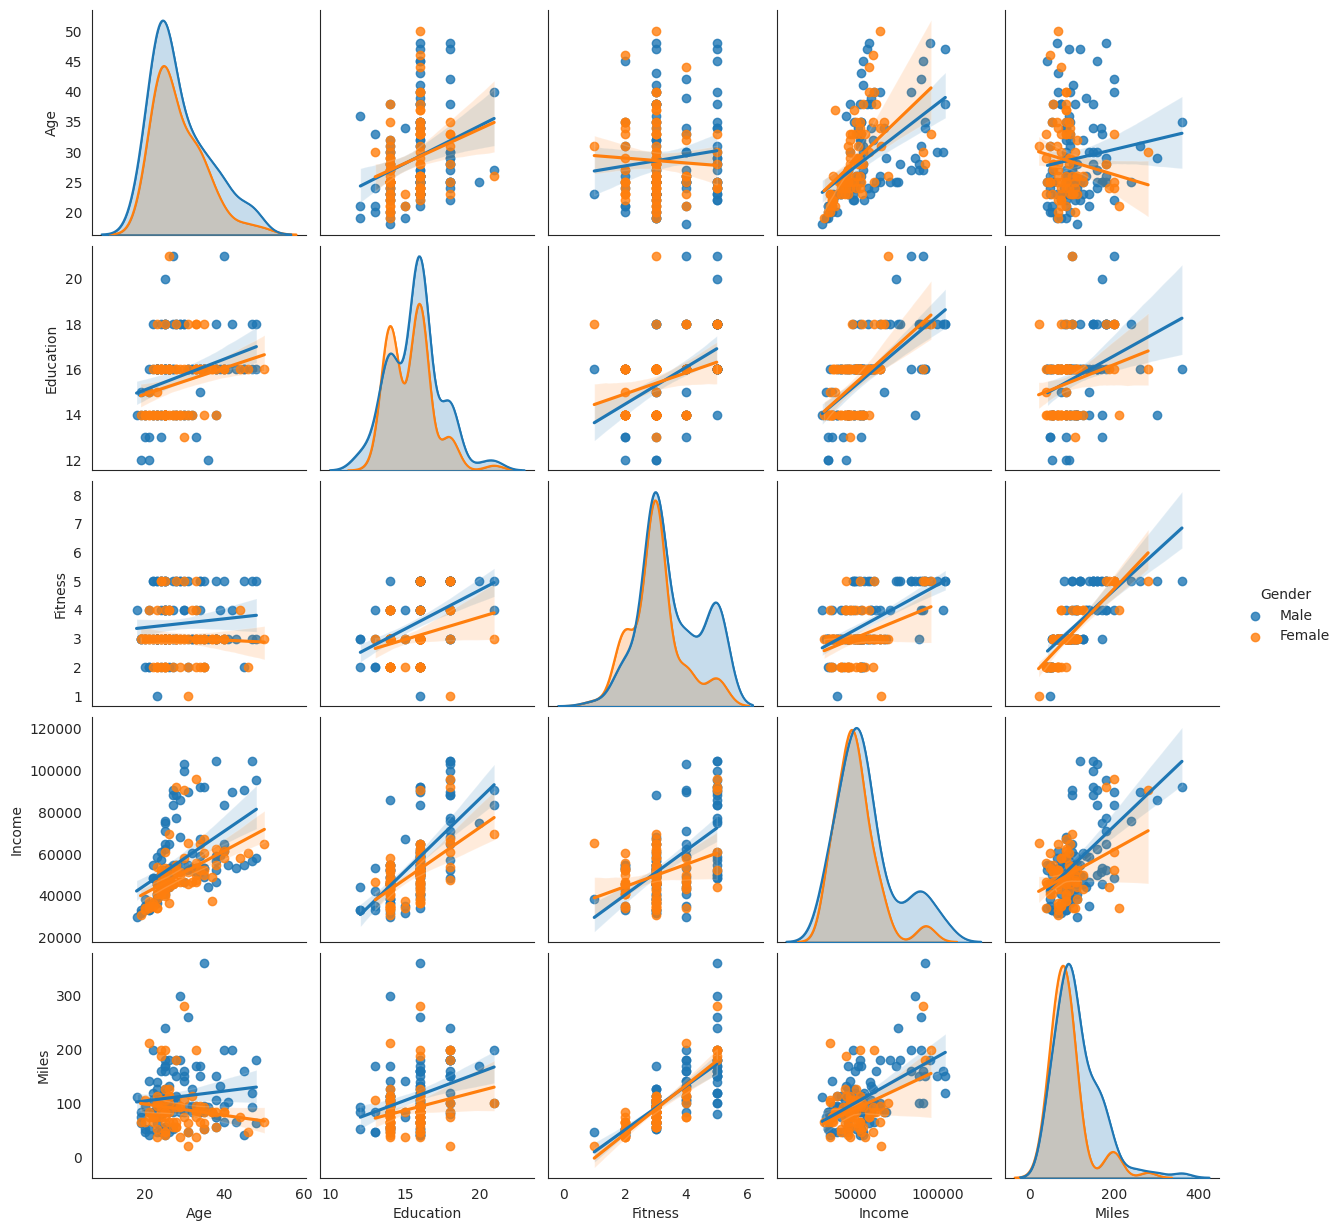

In [ ]:
x = sns.pairplot(d,
                kind = "reg",
                hue="Gender")
x.map_diag(sns.kdeplot)
plt.show()

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

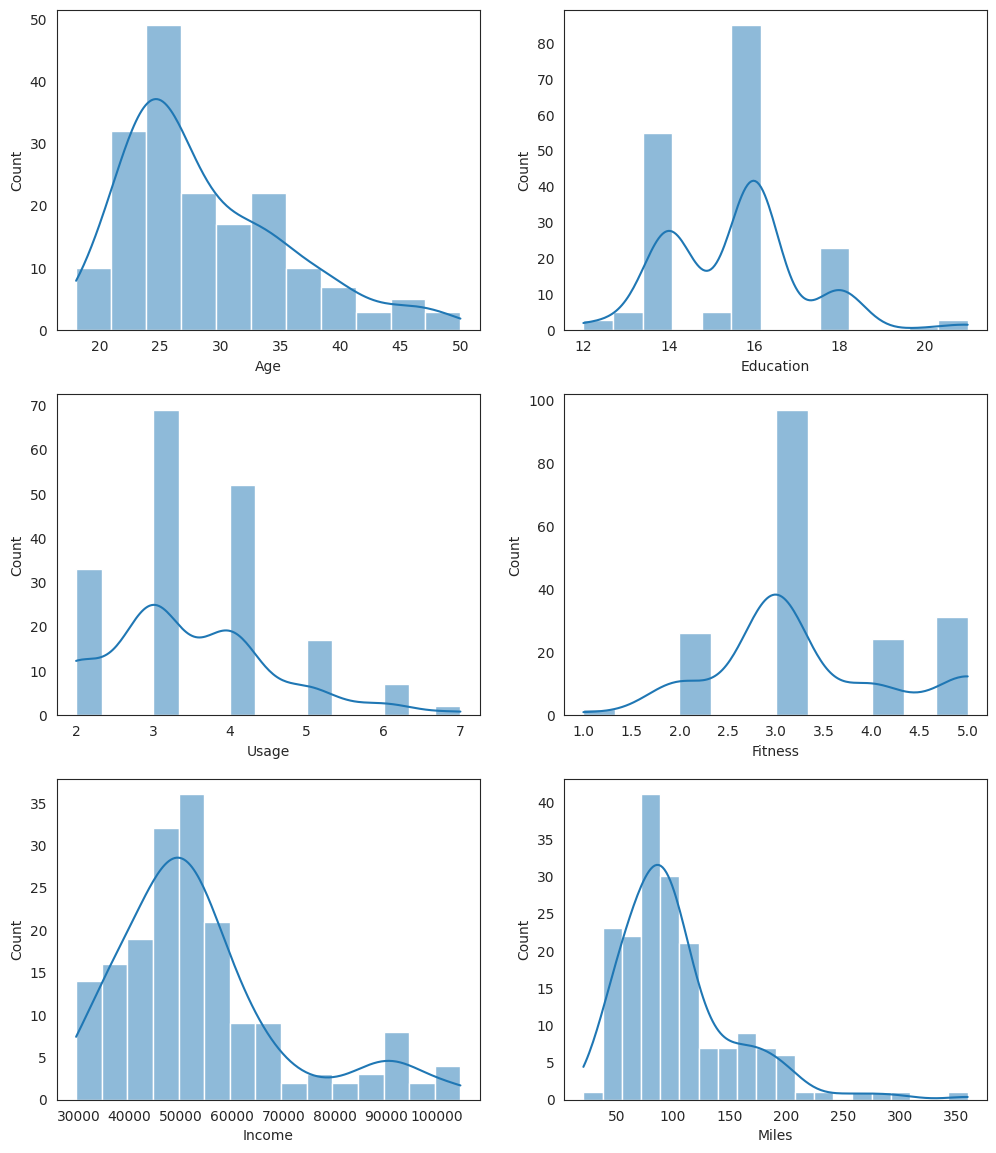

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

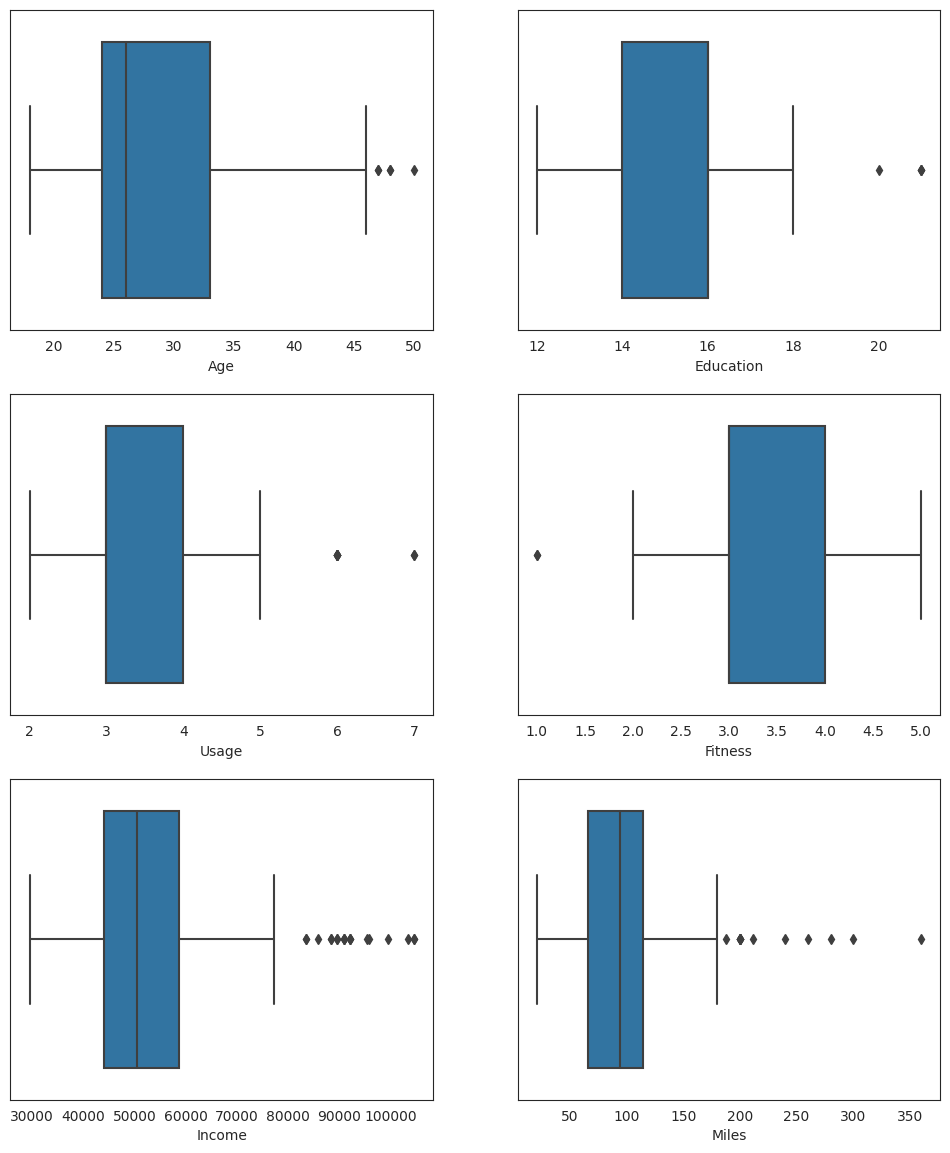

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

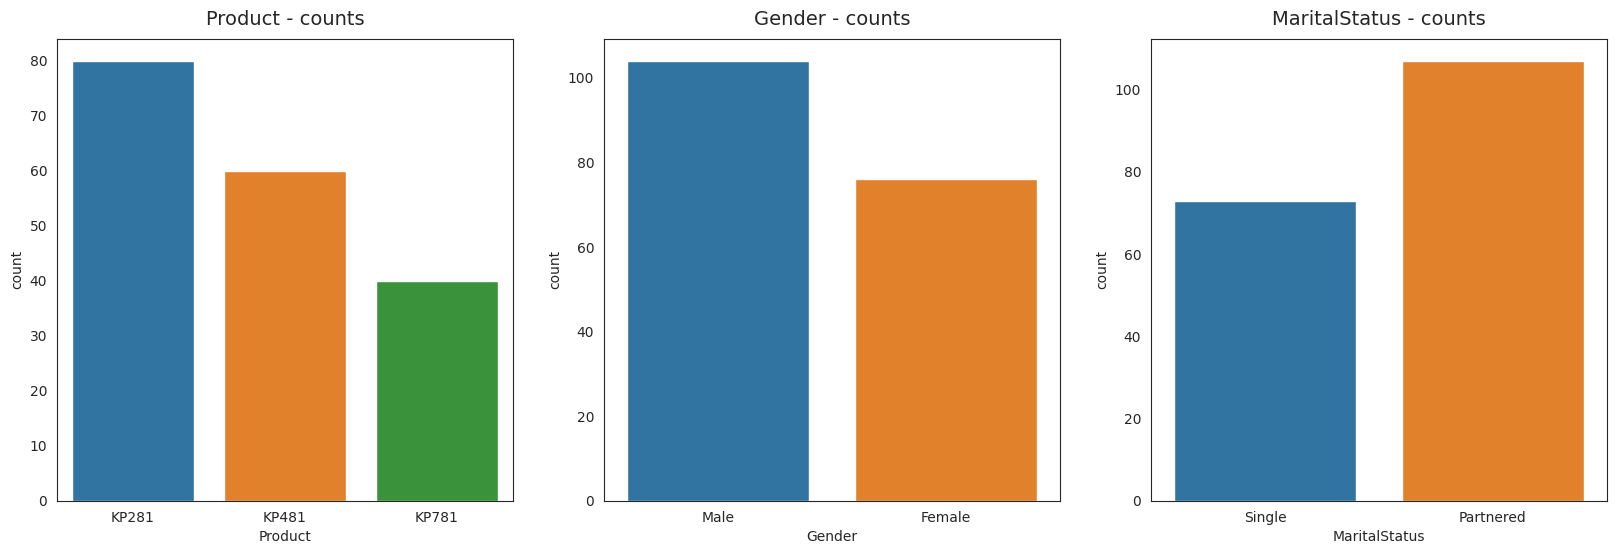

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()


In [ ]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

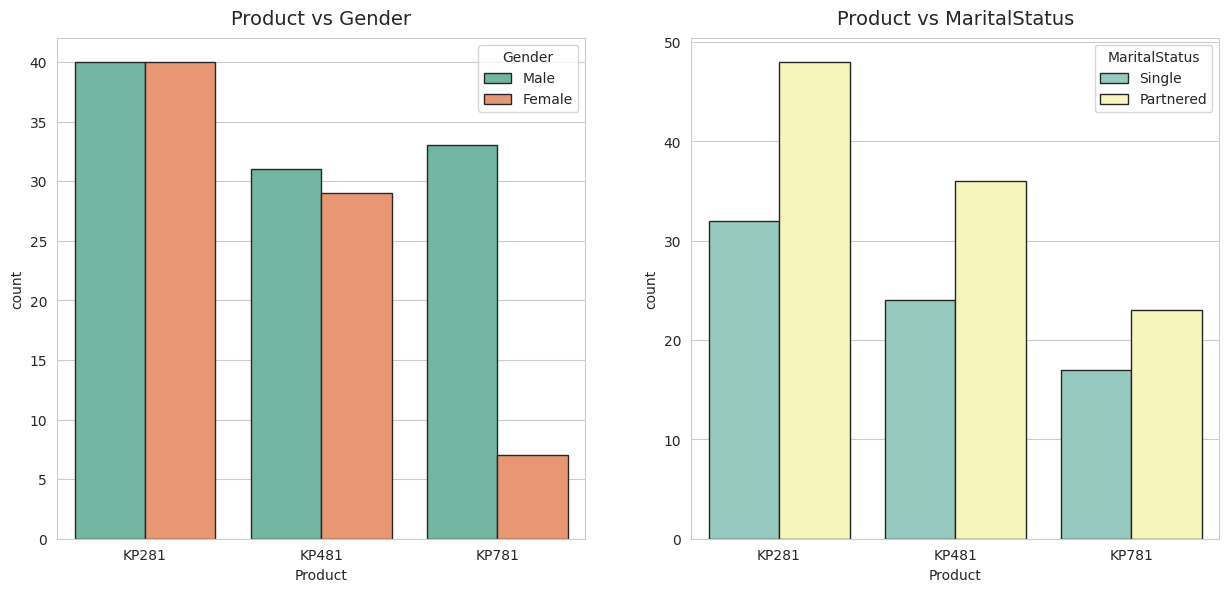

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

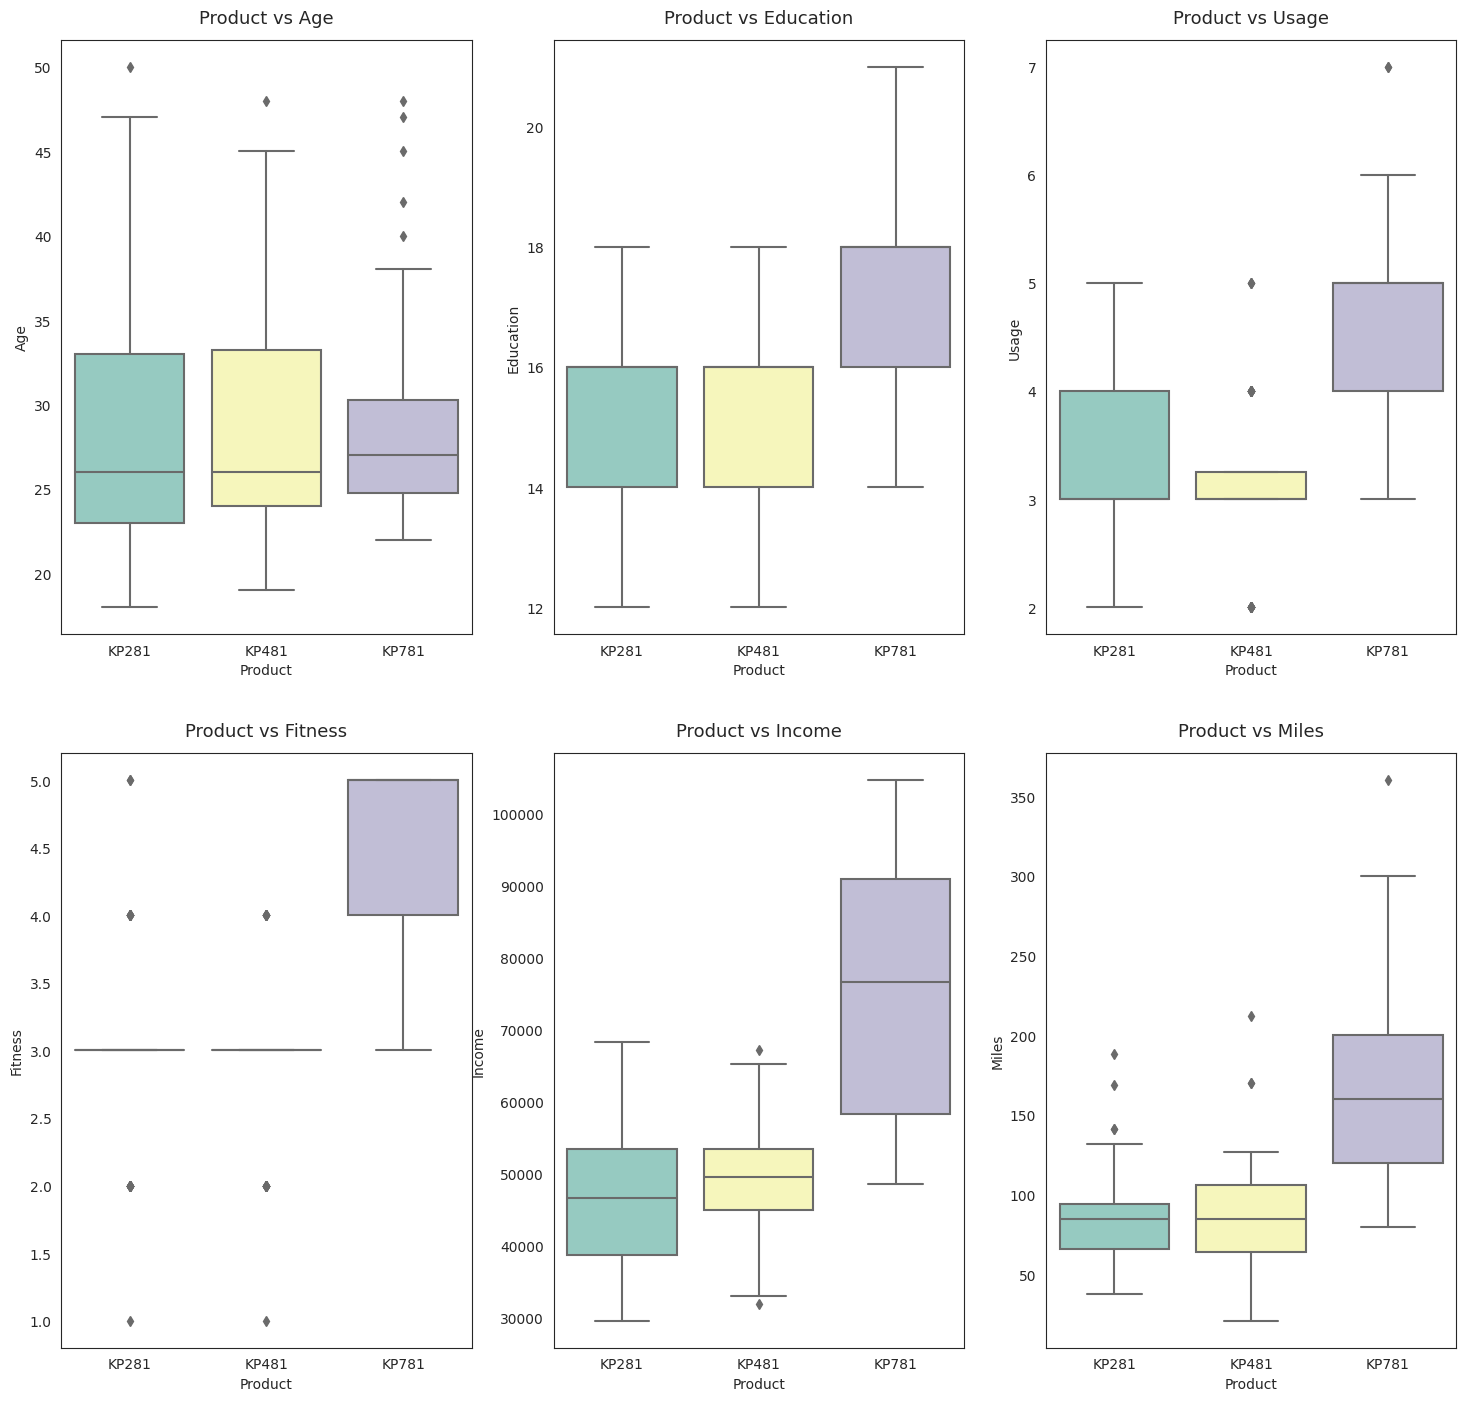

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1


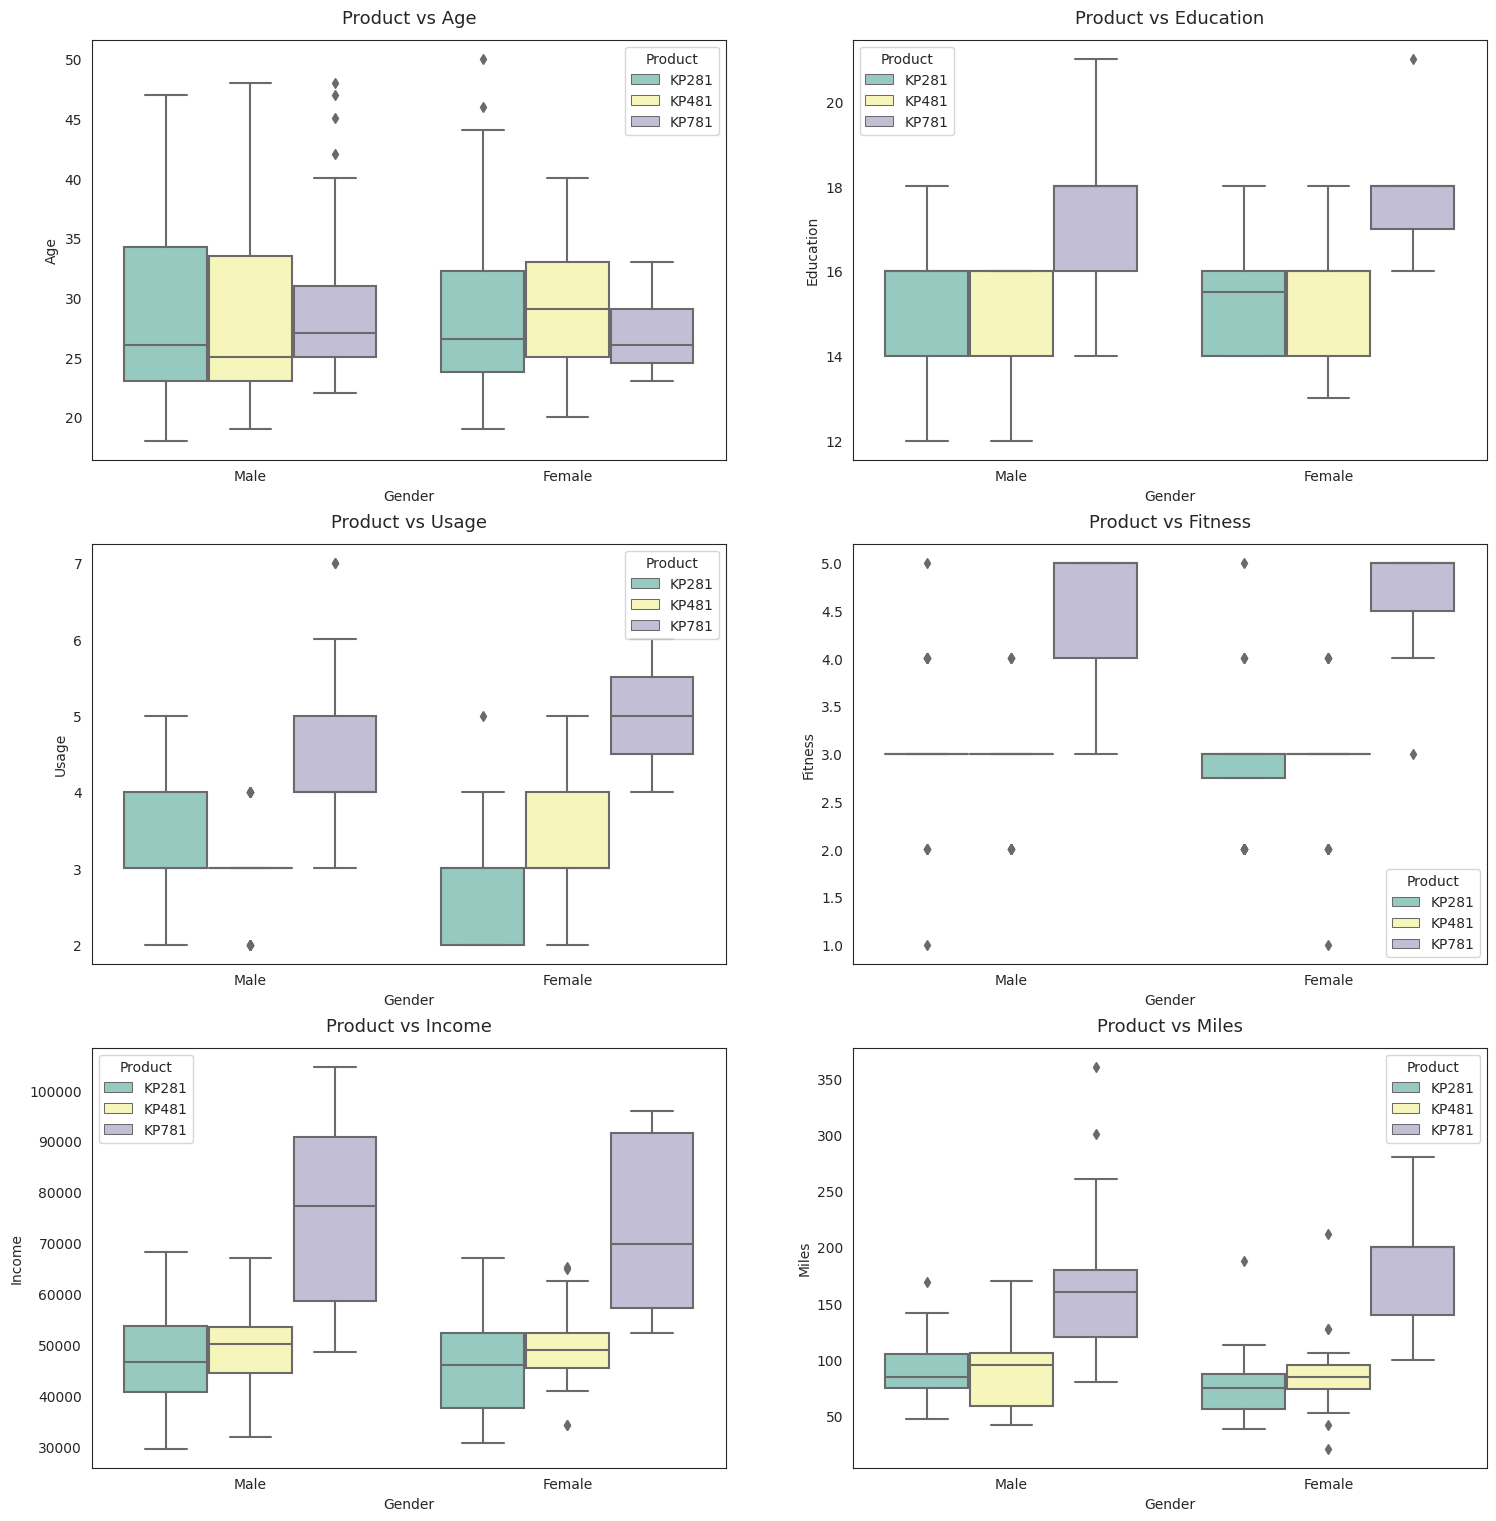

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

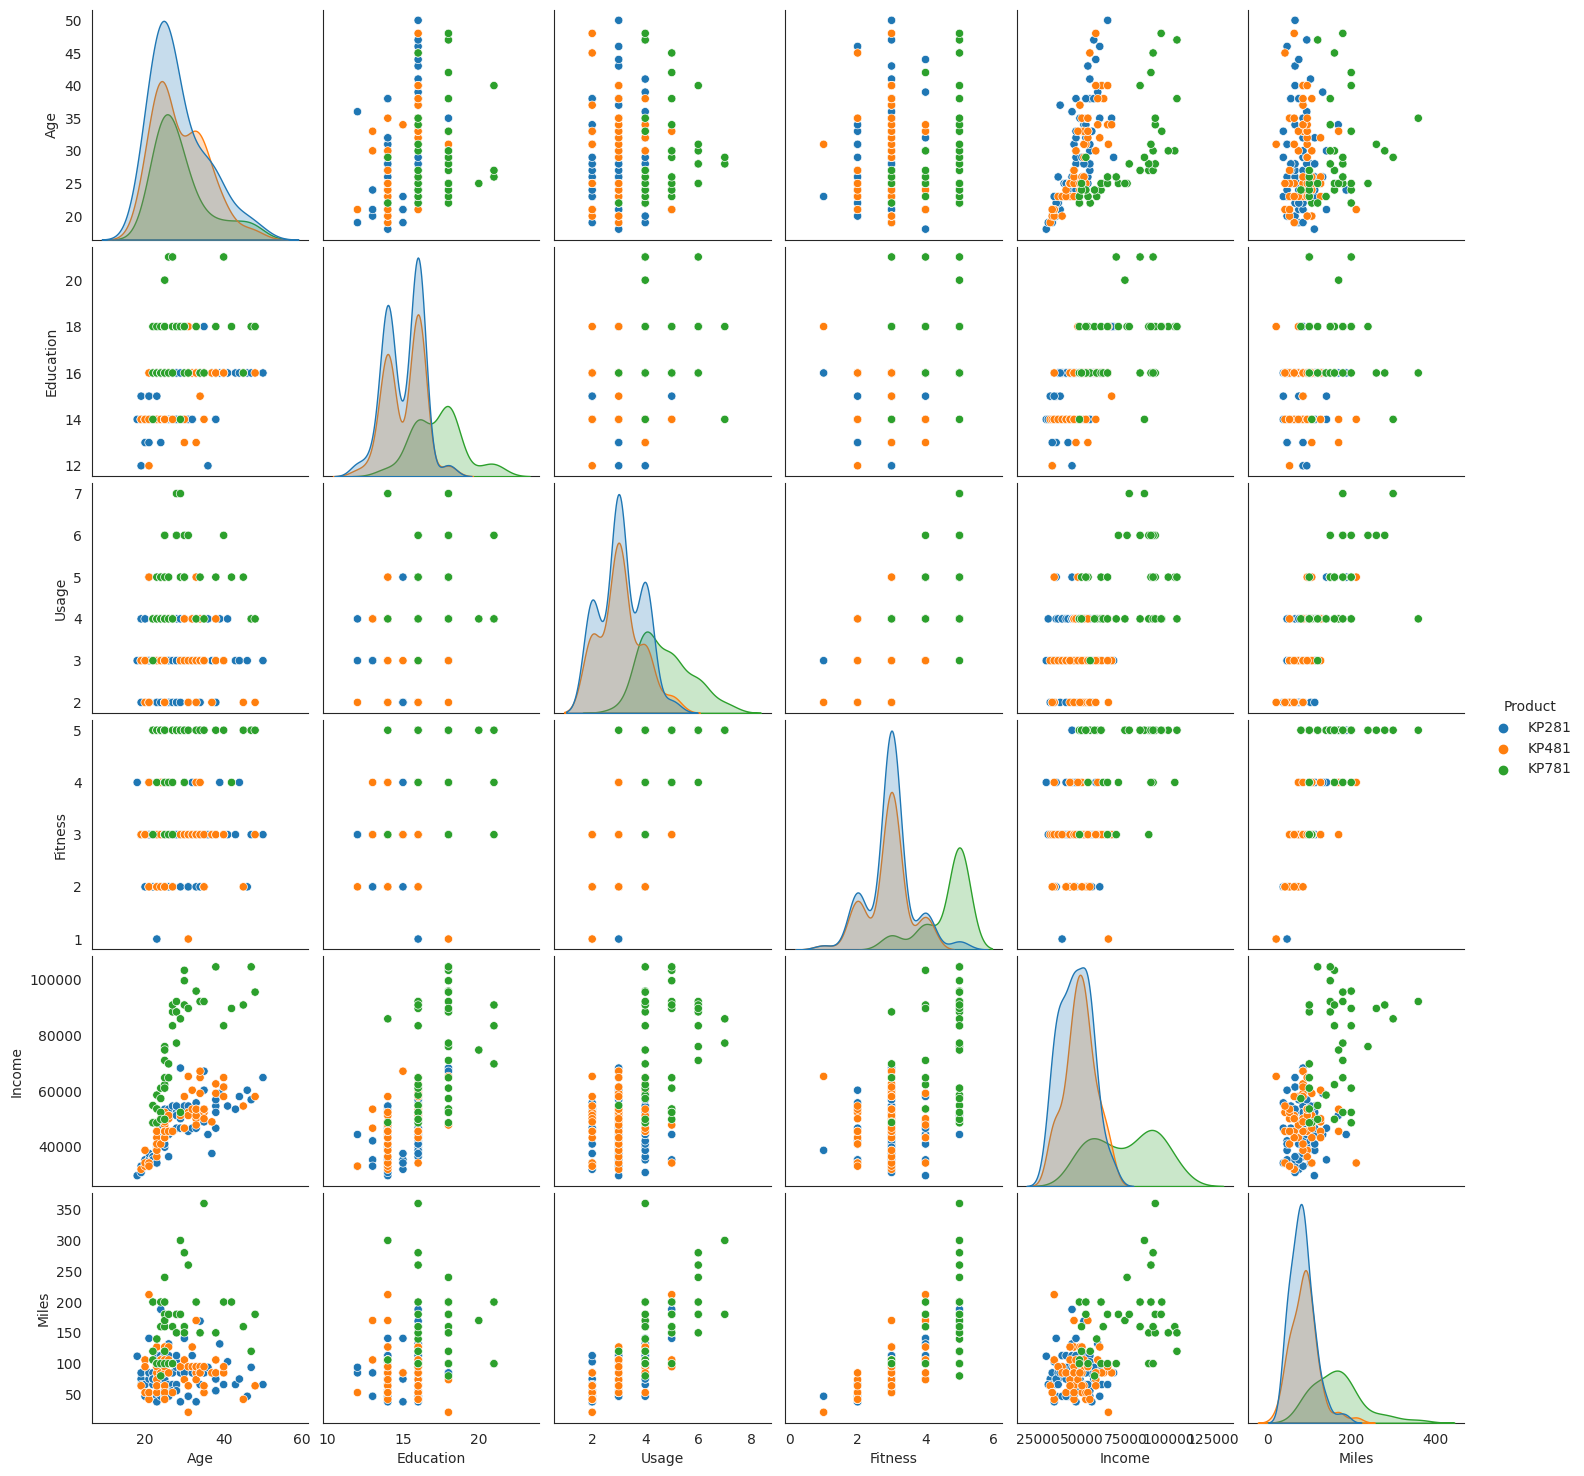

In [ ]:
sns.pairplot(df, hue ='Product')

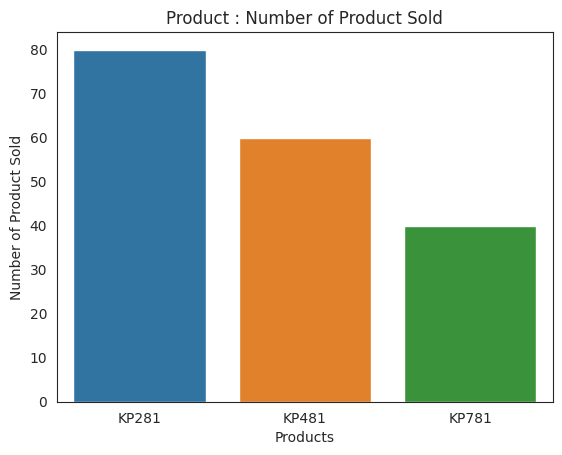

In [ ]:
sns.barplot(x = df["Product"].value_counts().index,
           y = df["Product"].value_counts())
plt.title("Product : Number of Product Sold")

plt.xlabel("Products")
plt.ylabel("Number of Product Sold")
plt.show()

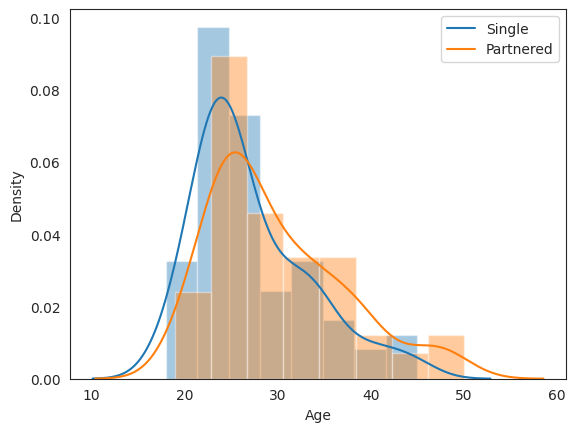

In [ ]:
single = df[df['MaritalStatus']=='Single']
married = df[df['MaritalStatus']=='Partnered']
sns.distplot(x=single['Age'])
sns.distplot(x=married['Age'])
plt.legend(['Single', 'Partnered'])
plt.xlabel('Age')
plt.show()

In [ ]:
d = df[["Age","Education","Usage","Fitness","Income","Miles","Gender"]]

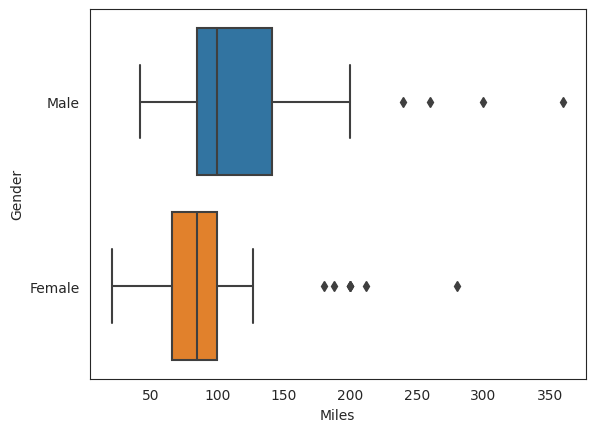

In [ ]:
sns.boxplot(x = "Miles",data = d,y="Gender")
plt.show()

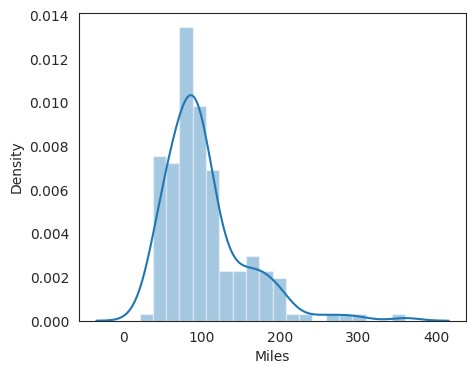

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(df["Miles"])
plt.show()

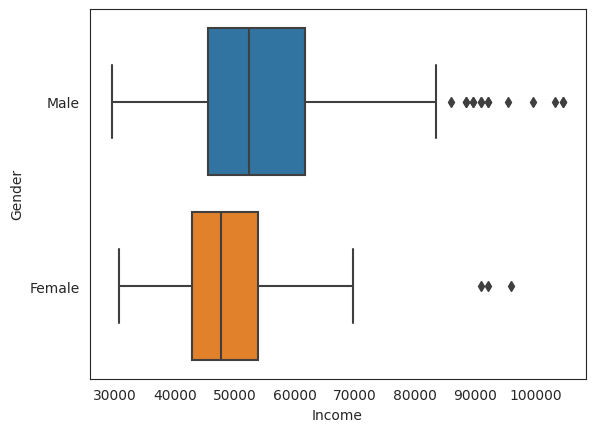

In [ ]:
sns.boxplot(x = "Income",data = d,y="Gender")
plt.show()

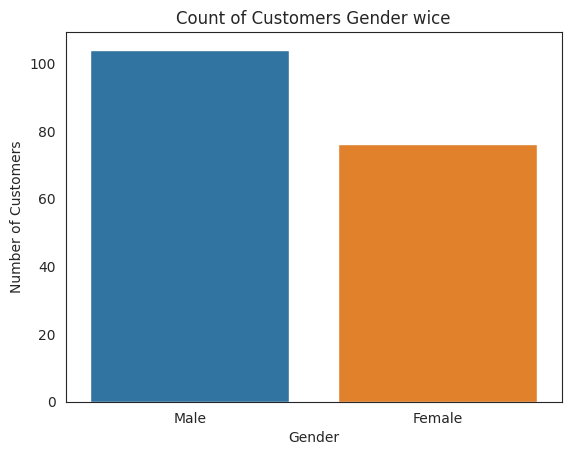

In [ ]:
sns.countplot(x = "Gender" , data = df)
plt.title("Count of Customers Gender wice")

plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
df["Product"].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

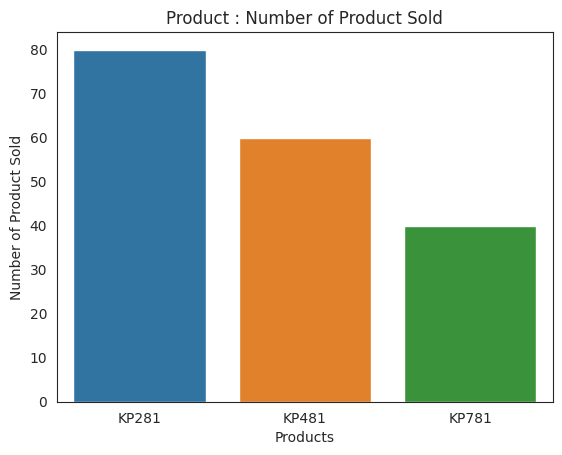

In [ ]:
sns.barplot(x = df["Product"].value_counts().index,
           y = df["Product"].value_counts())
plt.title("Product : Number of Product Sold")

plt.xlabel("Products")
plt.ylabel("Number of Product Sold")
plt.show()

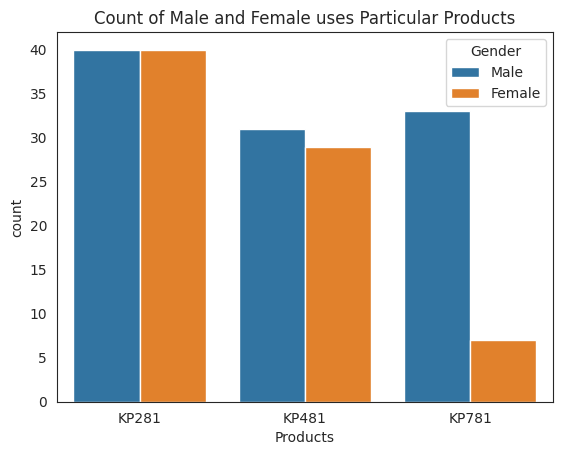

In [ ]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [ ]:
pd.concat(
    [ df.Product.value_counts(),
      df.Product.value_counts(normalize=True)
    ],
    keys=['counts', 'Marginal_Prob'],
    axis=1,
)

,counts,Marginal_Prob
KP281,80,0.444444
KP481,60,0.333333
KP781,40,0.222222


In [ ]:
pd.crosstab([df["Product"]],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
((pd.crosstab(df["Product"],df["Gender"],margins=True))/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


In [ ]:
(pd.crosstab([df["Product"]],df["Gender"],margins=True,normalize="columns"))*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


In [ ]:

pd.crosstab([df["Product"]],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
(pd.crosstab([df["Product"]],df["MaritalStatus"],margins=True)/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000
